In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from statsmodels.compat import lzip
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Freshprice/PriceElasticity/avocado.csv',index_col=0)
data.head()

'''
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
'''


'\nDate - The date of the observation\nAveragePrice - the average price of a single avocado\ntype - conventional or organic\nyear - the year\nRegion - the city or region of the observation\nTotal Volume - Total number of avocados sold\n4046 - Total number of avocados with PLU 4046 sold\n4225 - Total number of avocados with PLU 4225 sold\n4770 - Total number of avocados with PLU 4770 sold\n'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
#This data is for US only
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [8]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
data.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [10]:
data_ref=data.copy()
data_ref=data_ref[['AveragePrice','Total Volume']]
data_ref.head()

,AveragePrice,Total Volume
0,1.33,64236.62
1,1.35,54876.98
2,0.93,118220.22
3,1.08,78992.15
4,1.28,51039.60


In [11]:
grp_data_ref=data_ref.groupby(['Total Volume','AveragePrice']).count().reset_index()

In [12]:
grp_data_ref.head()

,Total Volume,AveragePrice
0,84.56,1.59
1,379.82,1.73
2,385.55,1.58
3,419.98,2.05
4,472.82,1.49


In [13]:
grp_data_ref.corr()

,Total Volume,AveragePrice
Total Volume,1.000000,-0.192752
AveragePrice,-0.192752,1.000000


In [14]:
type(grp_data_ref)

pandas.core.frame.DataFrame

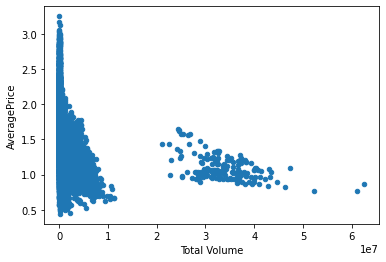

In [15]:
grp_data_ref.plot(y='AveragePrice',x='Total Volume',kind='scatter')

In [16]:
X = grp_data_ref.drop(["Total Volume"], axis=1)
y = grp_data_ref["Total Volume"]

print(X.head())
print(y.head())

   AveragePrice
0          1.59
1          1.73
2          1.58
3          2.05
4          1.49
0     84.56
1    379.82
2    385.55
3    419.98
4    472.82
Name: Total Volume, dtype: float64


In [17]:
X = sm.add_constant(X)

In [18]:
X.head()

,const,AveragePrice
0,1.0,1.59
1,1.0,1.73
2,1.0,1.58
3,1.0,2.05
4,1.0,1.49


In [19]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 12774
Number of rows in test data = 5475


In [21]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

#Null hypothesis- there is no relationship between price and quantity
#Alternate hypothesis- there is a relationship between price and quantity

#check for prob(F-stat) and p value, they shouldbe more than 0.05 for our alternative hypothesis to hold


                            OLS Regression Results                            
Dep. Variable:           Total Volume   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     490.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          1.34e-106
Time:                        04:50:32   Log-Likelihood:            -2.1058e+05
No. Observations:               12774   AIC:                         4.212e+05
Df Residuals:                   12772   BIC:                         4.212e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.266e+06   1.12e+05     29.091   

In [22]:
mean_price=np.mean(x_train['AveragePrice'])
mean_quantity=np.mean(y_train)
print("mean price: ",mean_price)
print("mean quantity: ",mean_quantity)

mean price:  1.4061883513386593
mean quantity:  876578.8039689985


In [24]:
intercept, slope=olsmodel.params
print(slope)

-1699302.4830125952


In [25]:
price_elasticity = (slope)*(mean_price/mean_quantity)    
price_elasticity

-2.7259835010768536

In [26]:
print("for every unit change in price, our quantity will change by ",price_elasticity," units")

for every unit change in price, our quantity will change by  -2.7259835010768536  units
